In [3]:
import os
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

## Import Cancer Data

In [57]:
#import breast cancer data
data = pd.read_csv('BC_data.csv')

#set independent and dependent data X and Y 
X = data.iloc[:,2:32].values
Y = data.loc[:, data.columns=='diagnosis'].values.ravel()

## Exploring the data balance 

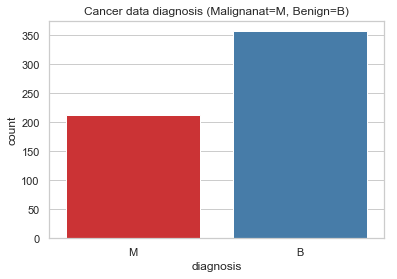

Percentage of Malignant diagnosis is 37.258347978910365
Percentage of Benign diagnosis is 62.741652021089635


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot
sns.set(style="white")
sns.set(style="whitegrid")
sns.countplot(x='diagnosis',data=data, palette='Set1')
plt.title('Cancer data diagnosis (Malignanat=M, Benign=B)')
plt.savefig('counter_plot_balance.png', dpi=300)
plt.show()

#percentage calculation 
count_malignant = len(data[data['diagnosis']=='M'])
count_benign = len(data[data['diagnosis']=='B'])
pct_malignant = count_malignant/(count_malignant+count_benign)
print("Percentage of Malignant diagnosis is", pct_malignant*100)
pct_benign = count_benign/(count_malignant+count_benign)
print("Percentage of Benign diagnosis is", pct_benign*100)

## Encoding categorical data

In [94]:
# Use LabelEncoder from scikitlearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
Y = LabelEncoder().fit_transform(Y)

## Split data into train and validation

In [72]:
#Train-Test Split - Dividing into Train and Validation(test) data 80:20
trainingShare = 0.8 
seed = 1
X_train, X_val, Y_train, Y_val =train_test_split(X, Y, 
                                              test_size = 1-trainingShare,
                                              random_state=seed,shuffle=True)

In [92]:
#quick check of diagnosis distribution in train data
num_zeros = (Y_train == 0).sum()
num_ones = (Y_train == 1).sum()

prec_B_train = (num_zeros/len(Y))*100
prec_M_train  = (num_ones/len(Y))*100

prec_B, prec_M

(62.741652021089635, 37.258347978910365)

## standard scaling 

In [97]:
#scaling independent variables 

sc      = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_val   = sc.transform(X_val)